# Import libraries

In [54]:
import netCDF4
import numpy# as np
import matplotlib.pyplot as plt
import datetime# as dt
import urllib
import time
import calendar

In [55]:
#!pip install netCDF4
#!pip install matplotlib

# Specify Station and Date

In [56]:
stn = '154'
startdate = "01/24/2025" # MM/DD/YYYY
enddate = "01/25/2025"

# Import data from THREDDS

In [59]:
# Comment out the URL that you are not using

# CDIP Archived Dataset URL
data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/' + stn + 'p1/' + stn + 'p1_historic.nc'

# CDIP Realtime Dataset URL
# data_url = 'http://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/realtime/' + stn + 'p1_rt.nc'

In [60]:
nc = netCDF4.Dataset(data_url)

# Read Buoy Variables

In [61]:
ncTime = nc.variables['sstTime'][:]
timeall = [datetime.datetime.fromtimestamp(t) for t in ncTime] # Convert ncTime variable to datetime stamps
Hs = nc.variables['waveHs']
Tp = nc.variables['waveTp']  #peak period
Dp = nc.variables['waveDp']  #directional peak


# Create a variable of the Buoy Name and Month Name, to use in plot title
buoyname = nc.variables['metaStationName'][:]
buoytitle = b" ".join(buoyname[:-40])               # added b to make a byte object

month_name = calendar.month_name[int(startdate[0:2])]
year_num = (startdate[6:10])

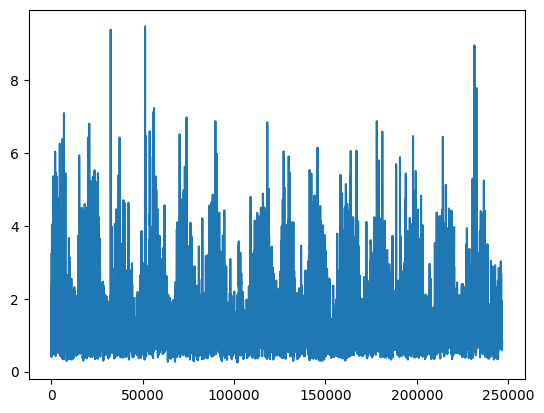

In [67]:
hs = np.asarray(Hs)

plt.figure()
plt.plot(hs)

# Local Indexing Functions

In [43]:
# Find nearest value in numpy array
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [44]:
# Convert from human-format to UNIX timestamp
def getUnixTimestamp(humanTime,dateFormat):
    unixTimestamp = int(time.mktime(datetime.datetime.strptime(humanTime, dateFormat).timetuple()))
    return unixTimestamp

# Time Index Values

In [45]:
unixstart = getUnixTimestamp(startdate,"%m/%d/%Y") 
neareststart = find_nearest(ncTime, unixstart)  # Find the closest unix timestamp
nearIndex = numpy.where(ncTime==neareststart)[0][0]  # Grab the index number of found date

unixend = getUnixTimestamp(enddate,"%m/%d/%Y")
future = find_nearest(ncTime, unixend)  # Find the closest unix timestamp
futureIndex = numpy.where(ncTime==future)[0][0]  # Grab the index number of found date

# Plot Wave Time Series

C:\Users\smorn\AppData\Local\Temp\ipykernel_7884\3211440970.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  pHs.set_xticklabels(['1','6','11','16','21','26','31'])


NameError: name 'days' is not defined

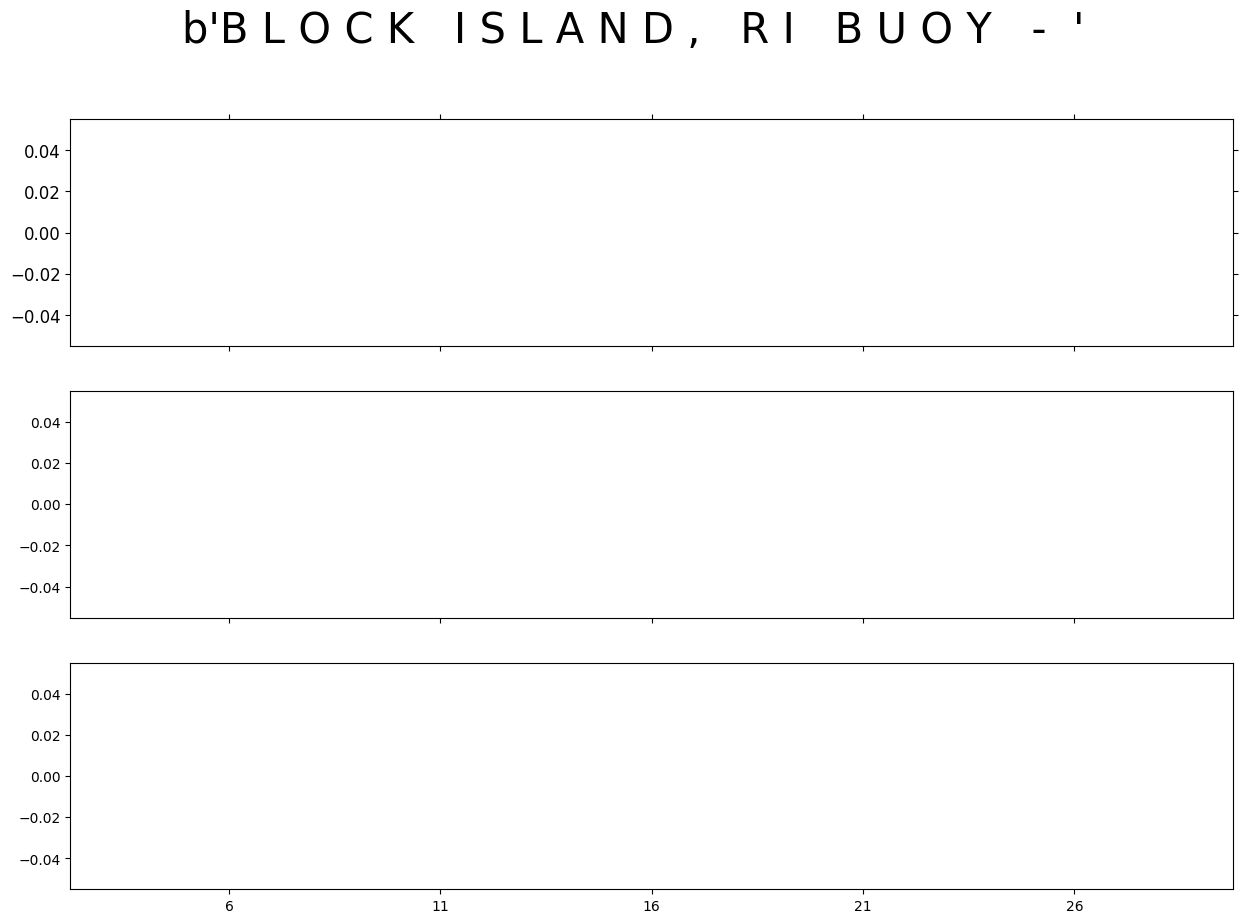

In [52]:
# Crete figure and specify subplot orientation (3 rows, 1 column), shared x-axis, and figure size
f, (pHs, pTp, pDp) = plt.subplots(3, 1, sharex=True, figsize=(15,10)) 


# Create 3 stacked subplots for three PARAMETERS (Hs, Tp, Dp)
pHs.plot(timeall[nearIndex:futureIndex],Hs[nearIndex:futureIndex],'b')
pTp.plot(timeall[nearIndex:futureIndex],Tp[nearIndex:futureIndex],'b')
pDp.scatter(timeall[nearIndex:futureIndex],Dp[nearIndex:futureIndex],color='blue',s=5) # Plot Dp variable as a scatterplot, rather than line

# Set Titles
plt.suptitle(buoytitle, fontsize=30, y=0.99)
#title(month_name + " " + year_num, fontsize=20, y=3.45)

# Set tick parameters
pHs.set_xticklabels(['1','6','11','16','21','26','31']) 
pHs.tick_params(axis='y', which='major', labelsize=12, right='off')
pHs.tick_params(axis='x', which='major', labelsize=12, top='off')

# Set x-axis tick interval to every 5 days
#days = DayLocator(interval=5) 
#daysFmt = DateFormatter('%d')
plt.gca().xaxis.set_major_locator(days)
plt.gca().xaxis.set_major_formatter(daysFmt)

# Label x-axis
plt.xlabel('Day', fontsize=18)

# Make a second y-axis for the Hs plot, to show values in both meters and feet
pHs2 = pHs.twinx()

# Set y-axis limits for each plot
pHs.set_ylim(0,8)
pHs2.set_ylim(0,25)
pTp.set_ylim(0,28)
pDp.set_ylim(0,360)

# Label each y-axis
pHs.set_ylabel('Hs, m', fontsize=18)
pHs2.set_ylabel('Hs, ft', fontsize=18)
pTp.set_ylabel('Tp, s', fontsize=18)
pDp.set_ylabel('Dp, deg', fontsize=18)

# Plot dashed gridlines
pHs.grid(b=True, which='major', color='b', linestyle='--')
pTp.grid(b=True, which='major', color='b', linestyle='--')
pDp.grid(b=True, which='major', color='b', linestyle='--')